In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad
from scipy.spatial.distance import cdist

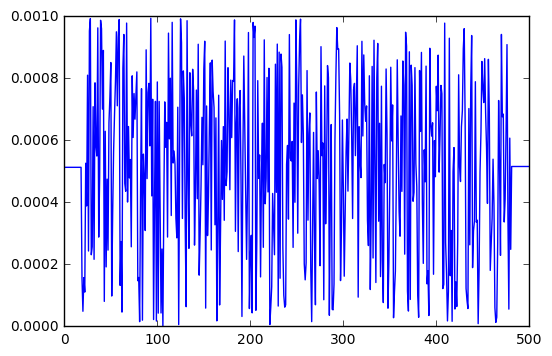

In [23]:
dx=1
downstream_distance=500
initializedx=np.arange(0,downstream_distance,dx)
x=initializedx+np.random.rand(len(initializedx))/50
yo=np.random.rand(len(x))/1000
yo[:19].fill(np.mean(yo))
yo[-19:].fill(np.mean(yo))
y=yo
#y=50*np.exp(-x/200)*(np.cos(np.pi*x/500))+50
#y=np.sin(x/100)+np.random.rand(len(x))/100
timesteps=1000
dt=2
timeslice=np.zeros((timesteps/dt,len(x)))
xtimeslice=np.zeros((timesteps/dt,len(x)))
omega=-1
rrr=2.5
d=40.
w=100.
cutoffmin=w/dx
cf=1/100
a=(2*1*cf)/d
kl=1
kd=1
Cstar=5.0
def G(i):
    return np.exp(-a*i)
R1=np.zeros(len(x))
R0=np.zeros(len(x))
El=np.zeros(len(x))
Ed=np.zeros(len(x))
xstream=np.zeros(len(x))
downstream=np.zeros(len(x))
plt.plot(x,y)


In [ ]:
for time in np.arange(0,timesteps,dt):
    bs=np.c_[x,y]
    rad=np.zeros(len(bs))

    for i in range(20,len(x)-19):
        azz=np.tril(cdist(bs[i-19:i+19],bs[i-19:i+19],'euclidean'))[17,0]
        bzz=np.tril(cdist(bs[i-19:i+19],bs[i-19:i+19],'euclidean'))[18,0]
        czz=np.tril(cdist(bs[i-19:i+19],bs[i-19:i+19],'euclidean'))[18,1]
        rad[i]=(azz*bzz*czz)/np.sqrt(abs((azz+bzz+czz)*(bzz+czz-azz)*(czz+azz-bzz)*(azz+bzz-czz)))
        rad[-1]=0.0001
        rad[-2]=0.0001
        if y[i+19]>y[i] and y[i-19]>y[i]:
            rad[i]=rad[i]*-1
        elif y[i+19]<y[i] and y[i-19]<y[i]:
            rad[i]=rad[i]
        R0[i]=(rad[i]/w)**-1
    for i in range(len(x)):
        for j in range(i-1):
            R1[i]=np.around(omega*R0[i]+(rrr*np.convolve(R0[i-j],G(i))/quad(G,0,np.inf,epsabs=0)[0]),decimals=10)
        mu=float(np.sum(np.diagonal(cdist(bs[0::],bs[0::],'euclidean'),1))/np.ndarray.flatten(cdist(bs[0:1],bs[-1::],'euclidean')))
        El[i]=kl*R1[i]*(mu**(-2/3))*dt
        El[-1]=0
        Ed[i]=kd*R1[i]*mu**(-2/3)*dt
        xstream[i]= np.around(np.sin(np.arctan((y[i]-y[i-10])/(x[i]-x[i-10])))*El[i],decimals=10)
        downstream[i]=np.around(np.cos(np.arctan((y[i]-y[i-10])/(x[i]-x[i-10])))*Ed[i],decimals=10)
    
    y= (y+xstream)
    y[-19:].fill(np.mean(y[-20]))
    x= (x+downstream)
    
    
    
    remove=[]
    for j in range(len(x)-int(cutoffmin)):
        for i in range(len(x)-1):
            if  np.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2)<w:
                if j<i-cutoffmin or j>i+cutoffmin:
                    interval=np.arange(i,j)
                    remove=np.concatenate((remove,interval))
                    remove=np.unique(remove)
                    x=np.delete(x,remove)
                    y=np.delete(y,remove)
                    grids=np.arange(0,downstream_distance,dx)
                    regridded=np.interp(grids,x,y)
                    x=grids
                    y=regridded
                    
    timeslice[time/dt]+=y
    xtimeslice[time/dt]+=x

    #if time%100==0:
        #plt.figure(figsize=(20,20))
    #plt.axes().set_aspect('equal')
            #plt.figure(figsize=(10,8))
    #plt.plot(x,y,color=plt.cm.copper(time*100))
    

C:\Users\jpisel\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:41: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\jpisel\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [ ]:
# plt.figure(figsize=(120,120))
#plt.axes().set_aspect(10)
#plt.ion()
%matplotlib inline
import time
import pylab as pl
from IPython import display

for i in range(0,5):
    #plt.figure(figsize=(120,120))
    # plt.axes().set_aspect(1000)
    #plt.plot(xtimeslice[i],timeslice[i],color=plt.cm.copper(i*10))
    pl.clf()
    #plt.xlim(0,len(x)*dx)
    plt.ylim(np.min(timeslice[i]),np.max(timeslice))
    #plt.axes().set_aspect(100)
    pl.plot(xtimeslice[i],timeslice[i],color=plt.cm.copper(i))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.5)

#plt.savefig("C:\Users\jpisel\Downloads\meander.jpg")  

In [ ]:
for i in range(0,10
              ):
    plt.axes().set_aspect(1000000)
    plt.plot(xtimeslice[i],timeslice[i],color=plt.cm.copper(i*1.2))

In [ ]:
 for j in range(len(x)-int(cutoffmin)):
        for i in range(len(x)):
            endx=x[-1]
            endy=y[-1]
            if  (np.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2))<w and j<i-cutoffmin and j>i+cutoffmin:
                print 'cutoff'
                cutoffindex=[i,j]
                print cutoffindex
               
            
'''            
                x=np.delete(x,np.arange(i,j))
                y=np.delete(y,np.arange(i,j))
                x=np.append(x,np.arange(x[-1]+(j-i)-1))
                y=np.append(y,np.arange(y[-1]+(j-i)-1))
'''
print x

In [8]:
remove=[]
for j in range(len(x)-int(cutoffmin)):
        for i in range(len(x)):
            if  np.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2)<w:
                if j<i-cutoffmin or j>i+cutoffmin:
                    interval=np.arange(i,j)
                    remove=np.concatenate((remove,interval))
                    remove=np.unique(remove)
x=np.delete(x,remove)
y=np.delete(y,remove)
grids=np.arange(0,1000,dx)+np.random.rand(len(x))/1000
regridded=np.interp(grids,x,y)
x=grids
y=regridded

ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [ ]:
x=np.delete(x,np.arange(30,50))
y=np.delete(y,np.arange(30,50))
plt.plot(x,y)

In [ ]:
grids=np.arange(0,1000,dx)
regridded=np.interp(grids,x,y)
plt.plot(grids,regridded)
len(regridded)

In [ ]:
plt.plot(x)

In [ ]:
plt.plot(xs,y)